# Long Short Term Memory (LSTM)


By the end of the lesson, all learners will be able to (minimum expected from everyone) :
- Recall the basic architecture of Long Short Term Memory.
- Find the necessity of cell state
- Evaluate the limitations of Recurrent Neural Networks.
- Implement the LSTM networks using Keras.

To start this lesson **all students must be aware** of the following concepts:

- Sequential Networks
- Workings of Recurrent Neural Networks
- Activation Functions like: $Tanh, ReLU$


## **Introduction**

The major drawback of a Recurrent Neural Network(RNN) is that the information is not retained in the memory when there is a large number of hidden timesteps. So, it suffers from vanishing gradient problems. The motivation behind the development of LSTM is to solve the vanishing gradient problem we face while training RNN for a long input sequence.

To get more clear about the vanishing gradient problem. Let us see an example.
Consider a small sentence:

I eat _ _ _ _ _.
Here, an RNN can easily predict a word something like food. However, it cannot cover long-term dependencies.

Let's consider another example:

John lived in Nepal for over 15 years. He listens to Nepali songs. He reads Nepali books. He is fluent in _ _ _ _ _.

Here, we can easily predict the next word as Nepalese because we relate the first sentence's context with the next word to come. But, an RNN is not able to do so. As time steps increase with the number of words increasing, RNN faces vanishing gradient problems. To solve this problem, **LSTM comes into action.** Because an LSTM saves the past hidden states' information for as long as it has to be stored.

LSTM is just the advancement or improvement of the RNN. They replace the RNN in the hidden states of a neural network.

The following figure defines the architecture of an LSTM network.

<div align="center">
<figure>


<p>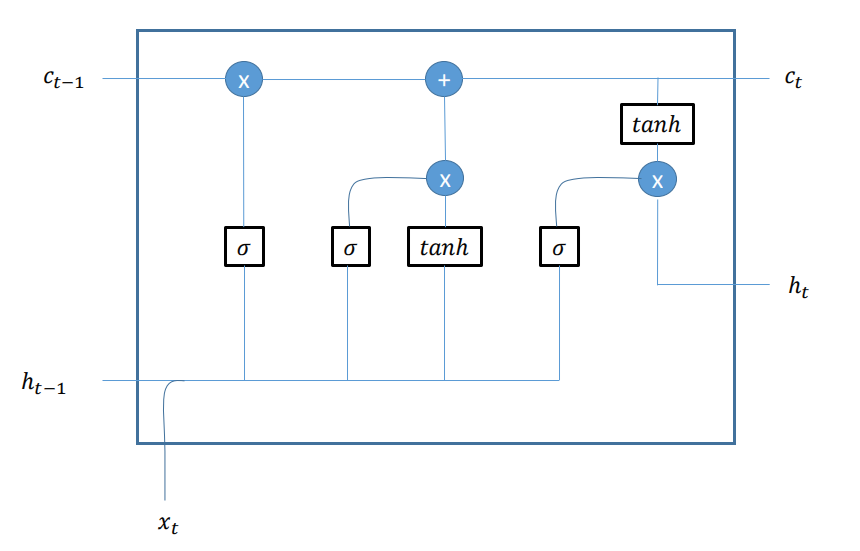</p>
<figcaption>Figure 1. A Single LSTM Cell
</figcaption>
</figure>
</div>


# Cell State

One of the important elements of LSTM is its cell-state. Cell state depicted as a straight path from $C_{t-1}$ to $C_t$ in the picture above allows information from the past to flow easily to the future. I am going to refer to the cell state as the memory of the LSTM network because the main objective of the cell state is to carry the relevant memory information through time. The information contained in the cell state is controlled by two gates. Firstly the forget gate allows the network to forget irrelevant information carried from the past and secondly, the input gate which adds new information in cell state to remember for future use.  
The cell state has a recurrent connection with fixed unit weight. This connects LSTM cell from a timestep $t$ to timestep $t+1$, the error can flow across the time stamps without vanishing or exploding. This property of LSTM solves the problem of long term dependency.
We will learn about how the cell state gets modified or updated in the topics below.


# Gates in LSTM Cell
Gates are just operations like summation, multiplication that controls the flow of information from one point in the network to another.

LSTM has mainly three types of gates:
1. Forget gate
2. Input gate
3. Output gate

The purpose of these gates is to control information at various stages of the network.

<div align="center">
<figure>


<p>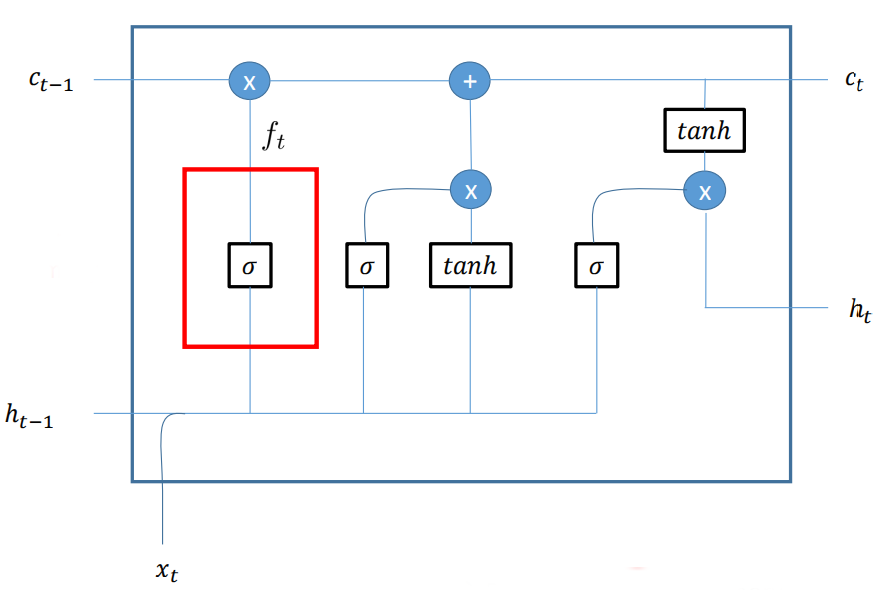</p>
<figcaption>Figure 2. Forget Gate
</figcaption>
</figure>
</div>

## Forget Gate

Forget gate was introduced by Felix A. Gers, Jurgen Schmidhuber and Fred Cummins in 1999 in their paper Learning to Forget: Continual Prediction with LSTM. It solves the problem of LSTM that the internal state value without reset may grow indefinitely and cause the network to break down.

Firstly, the current input $(x_t)$ and previous hidden state $(h_{t-1})$  are concatenated and passed through the forget gate. Forget gate is responsible for forgetting or simply removing information from short-term memory. In the forget gate, the input is passed through a neural network architecture with a sigmoid activation function at the output. As we know the sigmoid activation function $f(x) = \frac{1}{1+e^{-x}}$ returns the output in the range of 0 and 1 which can be interpreted as the importance of particular element in the memory. The output of the forget gate is then element-wise multiplied with the memory contained in cell state $C_{t-1}$, the output is a modified memory with only the relevant information of the past. The output of the forget gate near zero implies forgetting the information at that position, and the value near one implies retaining the information because when multiplying with a value near zero, the output moves towards zero ($\rightarrow0$) but with a value near 1 won't change the value that much.

For example, let's assume the previous cell state $C_{t-1} = \begin{bmatrix} 0.32\\ -0.5\\ 0.85\\ \end{bmatrix}$and output of forget gate $f_t = \begin{bmatrix}0.01\\ 0.99\\ 0.005 \end{bmatrix}$. Now the modified cell state after multiplying cell state $C_{t-1}$ and $f_t$ is $\begin{bmatrix}0.0032\\ -0.495\\ 0.00425\end{bmatrix}$.

From the above example, we can see that we are trying to erase both first and third elements of cell state which is analogous to forgetting that information. But, we are preserving most information contained in the second element of cell state which is analogous to remembering or retaining that information.  

**How to decide what to forget and what to remember ?**

This question is the most important element of forget gate, otherwise erasing randomly might remove important information we needed to use in future LSTM cells.

We use a feed-forward neural network architecture with weights $W_f$ and bias $b_f$ to learn what information is important and needs preserving and what can we get rid of.

The equation for the output of forget gate can be written as: $$f_t = \sigma(W_f * [h_{t-1}, x_t] + b_f) $$

You are going to see $[h_{t-1}, x_t]$ in many equations, which is just the concatenation of input vector $x_t$ and previous hidden state $h_{t-1}$.


## Input Gate and New Memory

<div align="center">
<figure>


<p>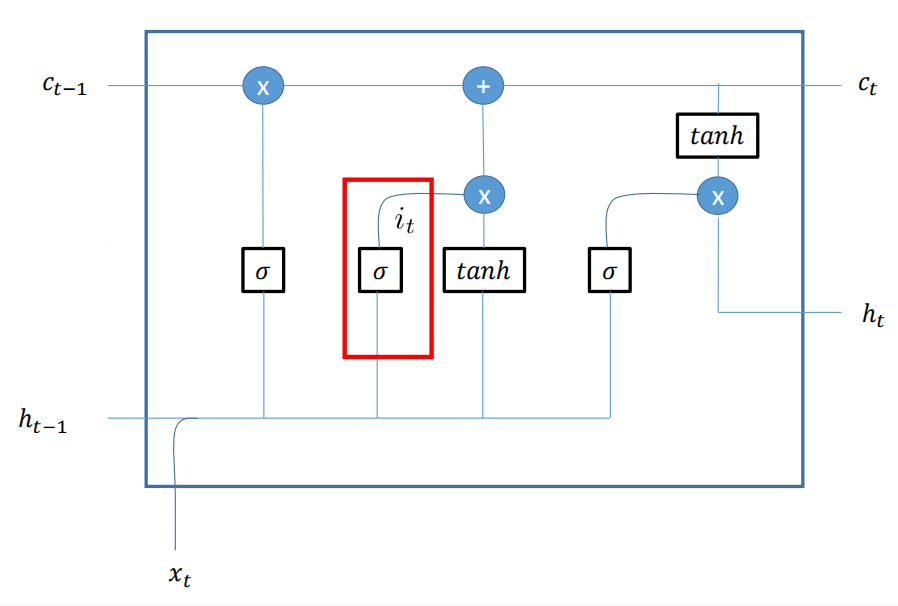</p>
<figcaption>Figure 3. Input Gate
</figcaption>
</figure>
</div>



The second operation in LSTM is deciding which new information to add in the modified cell state (after the operation of forget gate).

For this operation we use two network:  
  1. Input gate (A network with sigmoid $(\sigma)$ activation functon, sigmoid layer)
  2. A network with $tanh$ activation function (tanh layer)

The operation of first network here is analogous to forget gate, but the output votes which input($[h_{t-1}, x_t]$) to remember (keep) not to forget (remove). The output of this network can be written as $$i_t = \sigma(W_i * [h_{t-1}, x_t] + b_f)$$

This network learns to select the information that is worth remembering and rejects information of little or no importance.


<div align="center">
<figure>


<p>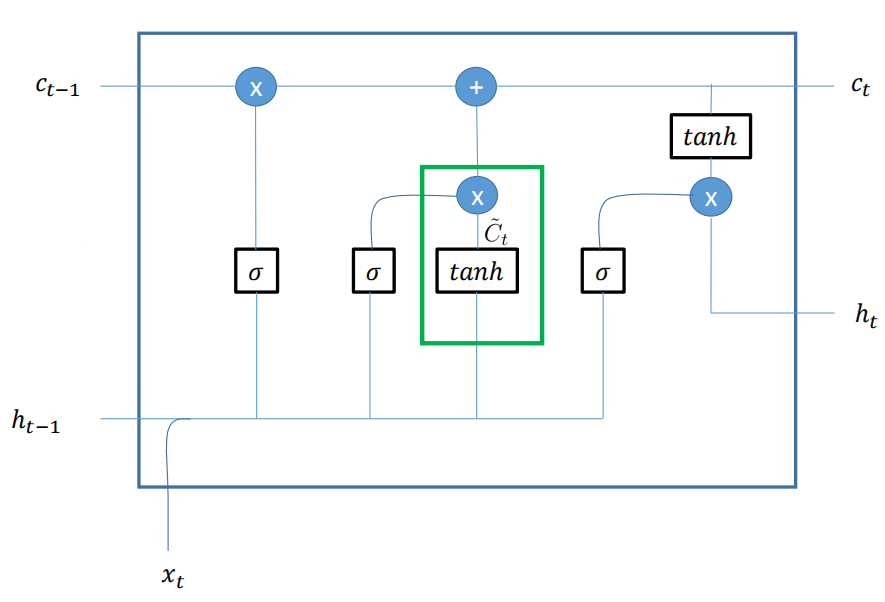</p>
<figcaption>Figure 4. Memory Using Tanh
</figcaption>
</figure>
</div>


 
The next operation is to create a new cell state with candidate memory ($\widetilde{C}$) using current state $x_t$ and previous hidden state $h_{t-1}$. In this network we use $tanh$ activation function (tanh layer) at the output to squash the $\widetilde{C}$ in the range of $[-1, 1]$. 

$$\widetilde{C}_t = tanh(W_C * [h_{t-1}, x_t] + b_C)$$

The new cell state is obtained by multiplying $\widetilde{C}_t$ with output of input gate $i_t$ and adding cell state obtained after applying the forget gate described above. $$C_t = C_{t-1} * f_t + i_t * \widetilde{C}_t$$


## Output Gate

<div align="center">
<figure>


<p>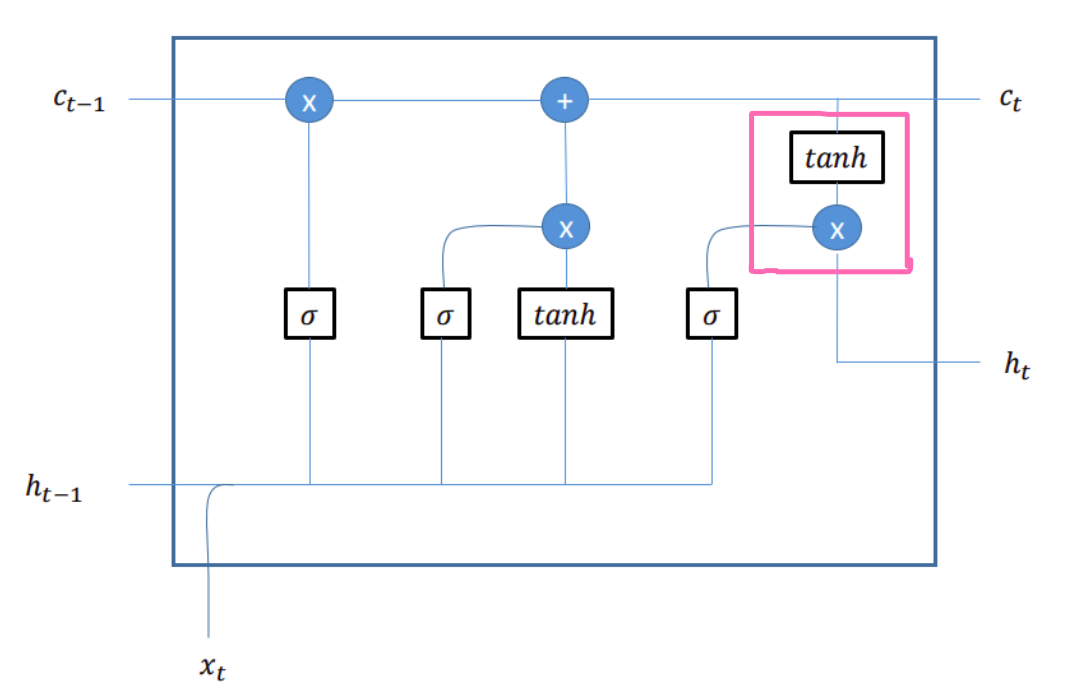</p>
<figcaption>Figure 5. Output Gate
</figcaption>
</figure>
</div>

Finally, we have to calculate what we are going to output from this LSTM-cell. First we pass our input to a sigmoid layer to decide which portion of cell state $(C_t)$ we are going to pass to the output

$$o_t = \sigma(W_o * [h_{t-1}, x_t] + b_o)$$

We perform element wise multiplication between squashed cell state obtained after passing current cell state $C_t$ to a $tanh()$ function with the output of output sigmoid layer $(o_t)$.

The output of the cell will be, $$h_t = o_t * tanh(C_t)$$


# Bidirectional LSTM

Like bidirectional RNN, Bidirectional LSTM works on the same principle with only differing on the recurrent unit which in this case is an LSTM cell. Bidirectional LSTM can be thought of as two LSTM recurrent networks working in parallel where one network takes information forward in time while another takes inputs backward.  

For a sentence of "Charlie is a bad dog. It barks to everybody". First LSTM recurrent network will take input from the beginning of the sentence to end while another LSTM recurrent network will take input from end of the sentence to the beginning.

When using the unidirectional LSTM, the input will run in a single way from start to the end. But, when we use bidirectional LSTM, the inputs run in two ways, past to future and future to past. Bidirectional LSTM is able to preserve information while moving through past to future and future to past. And, combining this we are able to preserve  information from both past and future. Hence, they are able to show very good results but having going through both ways, more time and computation are demanded by networks using Bidirectional LSTMs.

As we know a LSTM will generate a cell state $C_t$ and a hidden state $h_t$ at time t. But, incase of bidirectional LSTM, two LSTM are working for time t so two different set of cell state and hidden state is generated which can be written as $C_t^f$ and $h_t^f$ for forward and $C_t^b$ and $h_t^b$ for backward LSTM. Generally the resulting cell state and hidden state are generated by concatenating forward and backward cell and hidden state, but other method can be adopted as per the requirement.


There are many variants of LSTM networks like LSTM4, LSTM4a, LSTM5, LSTM6 which operate on the same basic principle of LSTM but introduces some variations to the network.

Two of the interesting variation of LSTM are  
  1. Peephole Network
  2. Gated Recurrent Network

***1. Peephole Network***  
It is a slight modification to the LSTM described above by allowing one or many gates used in the network to look at the long term memory. 

***2. Gated Recurrent Network (GRU)***  
GRU is a simplified variant of LSTM. It was proposed by Kyunghyun Cho et al. in 2014.


## Implementation of LSTM using keras


### Implement LSTM using keras LSTMCell


In [ ]:
%tensorflow_version 2.x
# import sequential model from keras
from tensorflow.keras.models import Sequential

# import lstmcell from keras layer
from tensorflow.keras.layers import LSTMCell

# we need a RNN layer to work with LSTMCell, so let's import it
from tensorflow.keras.layers import RNN

# create sequential model
model = Sequential()

# let's define the input shape for our lstm cell
# input shape is the combination of time-steps and dimension of input vector
input_shape = (10, 3)

# in above's input shape, we have 10 timestep long rnn with lstm cell which takes
# input vector of size 3

# let's define our output shape, output shape is the shape of vector we get as
# an output from the lstm network
output_units = 10
# this will return a vector of shape 10 as an output

# add RNN layer with LSTM cell
model.add(RNN(LSTMCell(output_units), input_shape=input_shape, return_sequences=True))

# return_sequences=True makes RNN to return output at every timestep

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  (None, 10, 10)            560       
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


### Implement LSTM using keras LSTM layer


In [ ]:
%tensorflow_version 2.x
# Let's define our LSTM using keras
# we have to import a sequential model
from tensorflow.keras.models import Sequential

# import LSTM layer
from tensorflow.keras.layers import LSTM

# to create lstm we have to provide input shape to the lstm layer
# generally the input is a vector of dimension n, but we also need to provide
# the number of time steps as well as the number of training set we have

# create a sequential model first
model = Sequential()

# input_shape=(number_of_time_steps, size_of_input_vector)
# define input_shape with
# number of time steps: 10
# number of features (size of feature vector): 5
# input shape is just a tuple with two elements (2-tuple)
input_shape = (10, 2)

# let's define the shape of output vector (dimensionality of output space)
output_units = 3

# add a lstm layer to this model
model.add(LSTM(output_units, input_shape=input_shape, return_sequences=True))

# providing return_sequences True makes the network to return output at every timestep

# let's print the sumary of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 3)             72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


## Implementation of Bidirectional LSTM using keras


In [ ]:
%tensorflow_version 2.x

import tensorflow as tf

# import keras sequential model
from tensorflow.keras.models import Sequential

# first import bidirectional wrapper and LSTM layer from keras layers
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Concatenate

# create size of hidden units and input_units
h_units = 256
i_units = 24

# create a sequential model
inputs = Input(shape=(None, i_units))

# Add bidirectional LSTM in the model
bi_lstm = Bidirectional(LSTM(h_units, return_state=True))

# return state will return the internal state of bidirectional LSTM
outputs, forward_h, forward_c, backward_h, backward_c = bi_lstm(inputs)

# as we can see the bidirectional lstm returns two set of hidden state and cell
# state (for forward and backward)

# to generate the final cell state for each time, we have to adopt a method to
# combine those two hidden state and cell state. Here we are going to append the
# hidden state and cell state, so that the final hidden and cell state would have
# the dimension of 2 * h_units

hidden_state = Concatenate()([forward_h, backward_h])
cell_state = Concatenate()([forward_c, backward_c])


In the next section we will mathematically understand how LSTM works, the forward propagation, how LSTM is trained using Back propagation through time.



# Limitations of LSTM

Even though LSTM solves the various problem of the vanilla recurrent neural network, it has some limitations and drawbacks of its own.

1. LSTM cannot solve the long term dependency problem for a sequence of long length.
2. The working and internal architecture of LSTM is somewhat complex because with the increase in no. of gates, the parameters also increases and hence the convergence time and computation power are required in excess amount. 
3. LSTM cannot store information in indexed fashion like a list or any structured data.


# Takeaways
The major takeaways from this lesson are:
- The hidden states in RNN was used to carry the information of previous hidden states as well as compute new hidden states
- The hidden states in LSTM are broken down into cell states and hidden states.
- Cell state acts as the memory unit used to store information of the previous hidden states.
- Bidirectional LSTM performs better than LSTM networks because they preserve informations from both past and future.



# References

1. Sepp Hochreiter and Jurgen Schmidhuber, LONG SHORT-TERM MEMORY, Neural Computation 9(8):1735-1780, 1997, https://www.bioinf.jku.at/publications/older/2604.pdf
2. Felix A. Gers, J¨urgen Schmidhuber, and Fred Cummins. Learning to forget: Continual prediction with LSTM. Neural computation, 12(10):2451–2471, 2000. https://pdfs.semanticscholar.org/e10f/98b86797ebf6c8caea6f54cacbc5a50e8b34.pdf
3. Christopher Olah, Understanding LSTM Networks, https://colah.github.io/posts/2015-08-Understanding-LSTMs/

